In [1]:
import scipy.io.wavfile as wf
fs, sound = wf.read('./data/sounds/barackobama2004.wav')

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [2]:
import numpy, torch
from torch.autograd import Variable

def get_random_chunk():
    start = numpy.random.randint(0, len(sound[:,1])-2000)
    _sound = sound[start:start+2000,0]
    _sound *= 0.9/numpy.max(numpy.abs(_sound))
    return _sound

train_loader = [] 
test_loader = []
for i in range(10):
    train_loader.append(torch.stack([torch.FloatTensor(get_random_chunk()).unsqueeze(0) for i in range(10)]))
for i in range(1):
    test_loader.append(torch.stack([torch.FloatTensor(get_random_chunk()).unsqueeze(0) for i in range(10)]))


In [3]:
from codes.ConvolutionalAudioCoders.Decoder import Decoder
from codes.ConvolutionalAudioCoders.Encoder import Encoder
from codes.VAE import VariationalAutoEncoder 

In [4]:
vae = VariationalAutoEncoder(18, 0)
vae.encoder = Encoder(12, 0)
vae.decoder = Decoder(12, 0)
vae.train_loader = train_loader
vae.test_loader = train_loader

In [5]:
vae.start()

started False


Process Process-1:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/andre/MachineLearning/VariationalAutoEncoder/codes/VAE.py", line 165, in train
    loss = model.loss(data, dec, model.mu, model.log_std)
  File "/home/andre/MachineLearning/VariationalAutoEncoder/codes/VAE.py", line 72, in loss
    latent_loss = -0.5 * torch.sum(1.0 + 2.0 * log_std - mean_sq - torch.exp(2.0 * log_std))
RuntimeError: value cannot be converted to type double without overflow: -inf


In [13]:
vae.

[(90, 186.24889526367187, 186.096416015625),
 (91, 186.20824829101562, 186.132919921875),
 (92, 186.21229248046876, 186.14986938476562),
 (93, 186.24857421875, 186.25541137695313)]

<IPython.core.display.Javascript object>


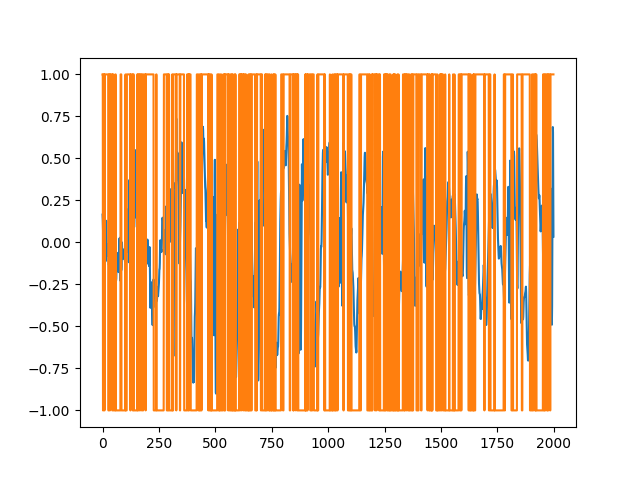

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
v = Variable(train_loader[0][7,0])
plt.plot(v.data.numpy())
plt.plot(vae(v.unsqueeze(0).unsqueeze(0))[0,0].data.numpy())

In [ ]:
for i in range(1):
    train_loader.append(torch.stack([torch.FloatTensor(get_random_chunk()).unsqueeze(0) for i in range(10)]))

In [28]:
len(train_loader)

1